Columns and Data TypesL
 Date      datetime64[ns]
Close             object
High              object
Low               object
Open              object
Volume            object
dtype: object

Sample data:
         Date              Close               High                Low  \
0        NaT              GOOGL              GOOGL              GOOGL   
1 2020-06-04   70.3785171508789  71.72309429138843  69.96599205492319   
2 2020-06-05  71.65840148925781   71.9709103787135   70.0461071028752   
3 2020-06-08  72.05748748779297  72.10525562528537  70.88509140875318   
4 2020-06-09  72.25852966308594  73.04079279119881  71.77484210279437   

                Open    Volume  
0              GOOGL     GOOGL  
1   71.4971694316438  26982000  
2  70.44520002096422  42642000  
3    70.974667107052  33878000  
4  71.91816171630913  33624000  

After conversion, data types:
 Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object


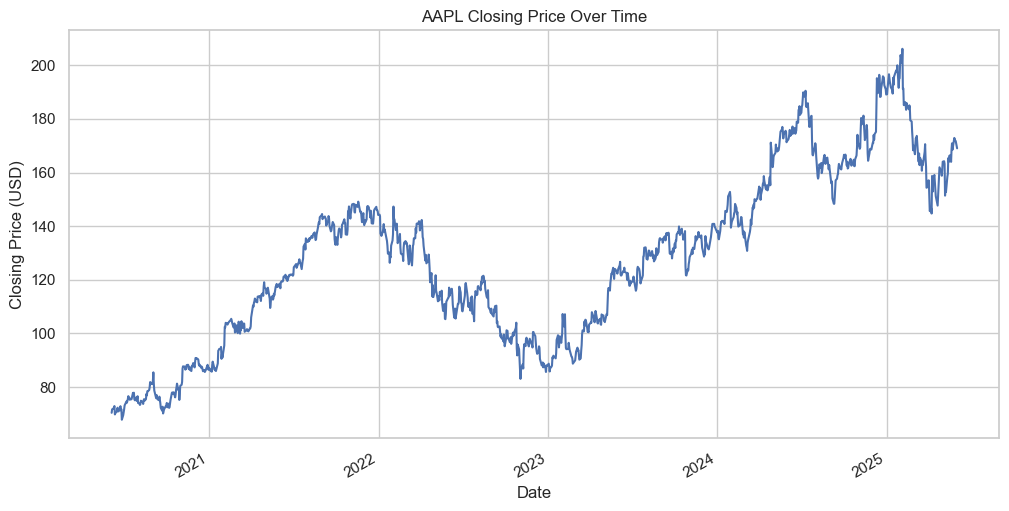

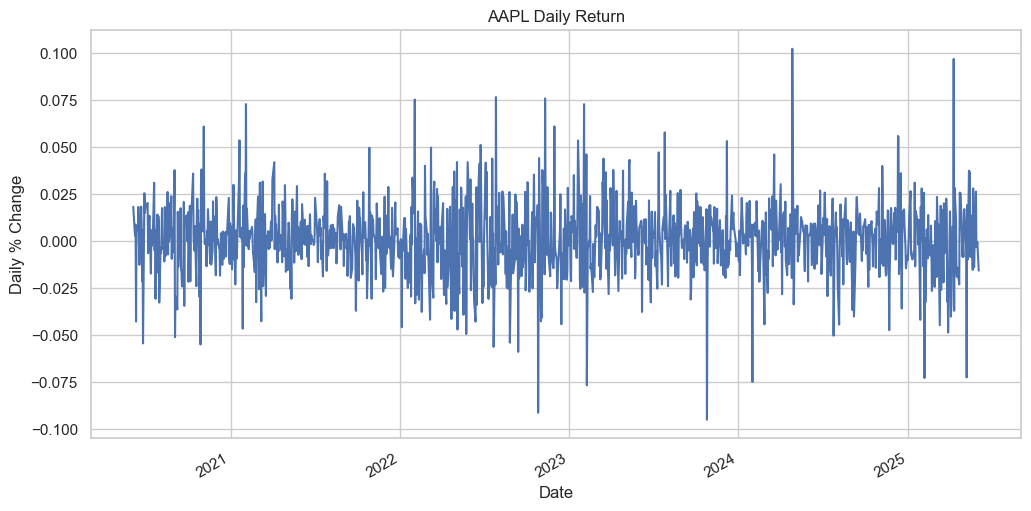

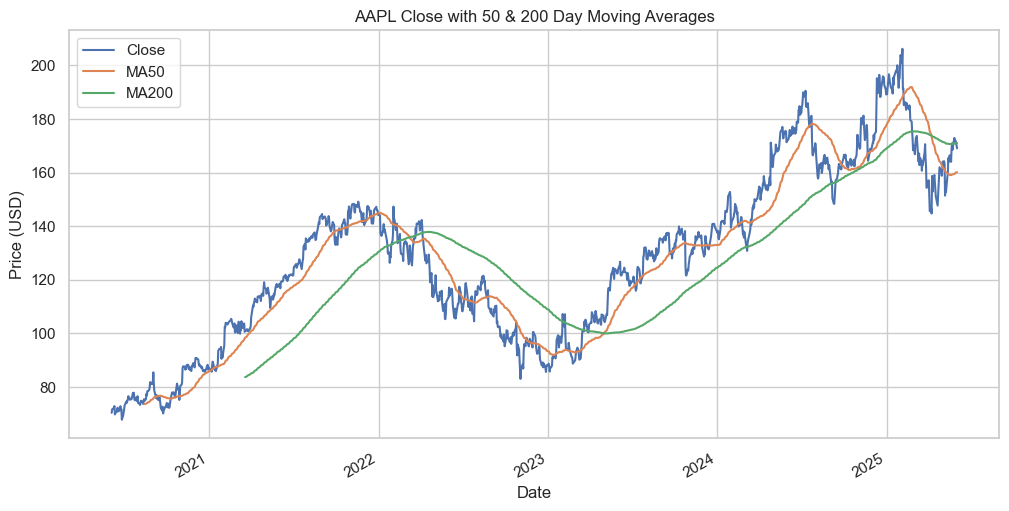

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Configure Plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

#load dataset
df = pd.read_csv(r"c:\Users\Yusma\Desktop\Python\workspace\google_5yr_one.csv", parse_dates=["Date"])

#preview columns and types to debug
print("Columns and Data TypesL\n", df.dtypes)
print("\nSample data:\n", df.head())

#Strip whitespace from column names if any
df.columns = df.columns.str.strip()

#Set date as index
df.set_index("Date", inplace = True)
df.sort_index(inplace = True)

#convert columns to numeric, coercing errors (invalid parsing become NaN)
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
    else:
        print(f"Warning: Column '{col}' not found in dataset.")

#drop rows with missing values to ensure plotting works
df.dropna(subset=['Close'], inplace = True)
print("\nAfter conversion, data types:\n", df.dtypes)

#plot closing price
df['Close'].plot(title="AAPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()

#Calculate and plot daily returns
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].plot(title="AAPL Daily Return")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.show()

#moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

df[['Close', 'MA50', 'MA200']].plot(title="AAPL Close with 50 & 200 Day Moving Averages")
plt.ylabel("Price (USD)")
plt.show()

